In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import glob
import numpy as np
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

# Exact Experiments

In [2]:
log_dir = "logs"
experiments = {
    "uni_init": "Uniform",
    "bad_init": "Bad"
}
environments = {
    "Deterministic (0.2)": "Easy",
    "Deterministic (0.1)": "Medium",
    "Deterministic (0.05)": "Hard"
}

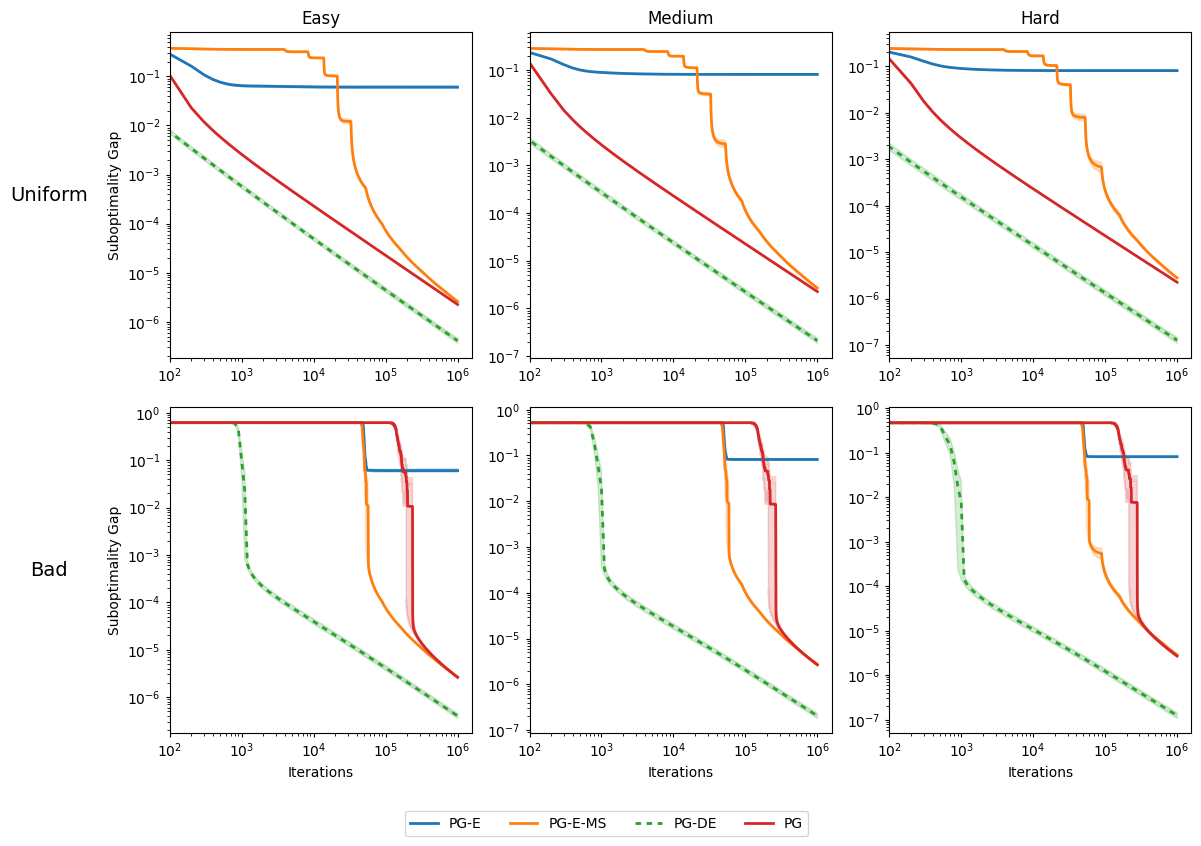

In [3]:
# Create subplot grid: rows for experiments, columns for environments
fig, axes = plt.subplots(
    nrows=len(experiments), 
    ncols=len(environments), 
    figsize=(12, 8), 
    squeeze=False
)

# Dash mapping: only PG-DE (det_pg_decaying_entropy) is dashed.
dashes = {
    "det_pg": (),                        # solid line (empty tuple)
    "det_pg_decaying_entropy": (2, 2),     # dashed line
    "det_pg_entropy": (),                # solid line
    "det_pg_entropy_multistage": (),     # solid line
}

# Loop over experiments and environments
for i, (exp_key, exp_label) in enumerate(experiments.items()):
    path = f"{log_dir}/{exp_key}"
    for j, (env_key, env_label) in enumerate(environments.items()):
        ax = axes[i, j]
        pathenv = f"{path}/{env_key}"

        log_files = glob.glob(f"{pathenv}/*.csv")
        assert len(log_files), f"No files in '{pathenv}/*.csv' found"
        # Concatenate all CSV files for the current environment
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

        line_plot = sns.lineplot(
            data=df,
            x="iteration",
            y="sub_opt_gap",
            hue="algo",
            style="algo",         # map style to "algo"
            ax=ax,
            linewidth=2.0,
            dashes=dashes,
        )
        # Remove legend from each subplot
        line_plot.get_legend().remove()

        # Set the x-scale and force x-axis to start at 10^2
        ax.set_xscale("log")
        ax.set_xlim(left=1e2)
        
        # Only add the title on the first row
        if i == 0:
            ax.set_title(env_label)

        # Only add the x-axis label on the last row
        if i == len(experiments) - 1:
            ax.set_xlabel("Iterations")
        else:
            ax.set_xlabel("")
        
        # Set the y-scale
        ax.set_yscale("log")
        
        # Only add the y-axis label on the first column
        if j == 0:
            ax.set_ylabel("Suboptimality Gap")
        else:
            ax.set_ylabel("")
        
        # Annotate the leftmost subplot of each row with the experiment name horizontally
        if j == 0:
            ax.annotate(
                exp_label,
                xy=(-0.4, 0.5),         # Adjust the x-offset as needed
                xycoords="axes fraction",
                fontsize=14,
                ha="center",
                va="center",
                rotation=0              # horizontal text
            )

# Obtain the labels from the first subplot (assumed to be the same across plots)
lines, labels = axes[0, 0].get_legend_handles_labels()

renamer = {
    "det_pg": "PG",
    "det_pg_decaying_entropy": "PG-DE",
    "det_pg_entropy": "PG-E",
    "det_pg_entropy_multistage": "PG-E-MS",
}
labels = [renamer.get(label, label) for label in labels]

fig.legend(lines, labels, loc="lower center", ncol=9, bbox_to_anchor=[0.5, -0.06])
plt.tight_layout()
plt.savefig("plots/pg_entropy.png", bbox_inches="tight", dpi=400)

# Stochastic Experiments

## Uniform Initilization

In [ ]:
environments = [
    "Bernoulli (easy)",
    "Gaussian (easy)",
    "Beta (easy)",
    "Bernoulli (hard)",
    "Gaussian (hard)",
    "Beta (hard)",
]
log_dir = "logs"
experiment_name = f"uni_init"
path = f"{log_dir}/{experiment_name}"

In [ ]:
fig, axes = plt.subplots(
    nrows=2, ncols=3, figsize=(12, 8), sharex=False, sharey=False, squeeze=False
)
for idx, (env, ax) in enumerate(zip(environments, axes.flat)):
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    df = df.sort_values("algo")
    df_baseline = df[df["algo"].str.contains("entropy") == False]

    line_plot = sns.lineplot(
        data=df_baseline, x="iteration", y="sub_opt_gap", hue="algo", ax=ax, linewidth=2.0
    )

    # remove legend in subplots
    line_plot.get_legend().remove()
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Log Suboptimality Gap")
    ax.set_yscale("log")
    ax.set_title(env)

    n_lines = len(ax.lines) // 2
    for i in range(n_lines, 2 * n_lines):
        if "entropy" in ax.lines[i].get_label():
            ax.lines[i].set_linestyle("--")
            ax.lines[i - n_lines].set_linestyle("--")

# obtain the labels of the first subplot
# assume that all plots have the same labels
lines, labels = fig.axes[0].get_legend_handles_labels()

renamer = {
    "spg_ess": "SPG-ESS",
    "spg_gradient_step_size": "SPG-O-G",
    "spg_delta_step_size": "SPG-O-R",
    "spg_ess_eta_0_1_18": "SPG-ESS",
    "spg_entropy_multistage": "SPG-E-MS",
    "spg_multistage_ess": "SPG-ESS [D]",
    "spg_entropy_ess": "SPG-E-ESS",
}

labels = [renamer.get(label, label) for label in labels]

fig.legend(lines, labels, loc="lower center", ncol=9, bbox_to_anchor=[0.5, -0.06])
plt.tight_layout()
plt.savefig("plots/spg_uniform.png", bbox_inches="tight", dpi=400)

In [ ]:
fig, axes = plt.subplots(
    nrows=2, ncols=3, figsize=(12, 8), sharex=False, sharey=False, squeeze=False
)
for idx, (env, ax) in enumerate(zip(environments, axes.flat)):
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    df = df.sort_values("algo")
    df_baseline = df[df["algo"].str.contains("entropy") == False]
    df_entropy = df[df["algo"].str.contains("entropy") == True]
    df_plot = pd.concat([df_entropy, df_baseline])

    line_plot = sns.lineplot(
        data=df_plot, x="iteration", y="sub_opt_gap", hue="algo", ax=ax, linewidth=2.0
    )

    # remove legend in subplots
    line_plot.get_legend().remove()
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Log Suboptimality Gap")
    ax.set_yscale("log")
    ax.set_title(env)

    n_lines = len(ax.lines) // 2
    for i in range(n_lines, 2 * n_lines):
        if "entropy" in ax.lines[i].get_label():
            ax.lines[i].set_linestyle("--")
            ax.lines[i - n_lines].set_linestyle("--")

# obtain the labels of the first subplot
# assume that all plots have the same labels
lines, labels = fig.axes[0].get_legend_handles_labels()

renamer = {
    "spg_ess": "SPG-ESS",
    "spg_gradient_step_size": "SPG-O-G",
    "spg_delta_step_size": "SPG-O-R",
    "spg_ess_eta_0_1_18": "SPG-ESS",
    "spg_entropy_multistage": "SPG-E-MS",
    "spg_multistage_ess": "SPG-ESS [D]",
    "spg_entropy_ess": "SPG-E-ESS",
}

labels = [renamer.get(label, label) for label in labels]

fig.legend(lines, labels, loc="lower center", ncol=9, bbox_to_anchor=[0.5, -0.06])
plt.tight_layout()
plt.savefig("plots/spg_entropy_uniform.png", bbox_inches="tight", dpi=400)


## Bad Initialization

In [ ]:
environments = [
    "Bernoulli (easy)",
    "Gaussian (easy)",
    "Beta (easy)",
    "Bernoulli (hard)",
    "Gaussian (hard)",
    "Beta (hard)",
]
log_dir = "logs"
experiment_name = f"bad_init"
path = f"{log_dir}/{experiment_name}"

In [ ]:
fig, axes = plt.subplots(
    nrows=2, ncols=3, figsize=(12, 8), sharex=False, sharey=False, squeeze=False
)
for idx, (env, ax) in enumerate(zip(environments, axes.flat)):
    # path of all algorithm log of the environment
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    df = df.sort_values("algo")
    df_baseline = df[df["algo"].str.contains("entropy") == False]
    df_entropy = df[df["algo"].str.contains("entropy") == True]
    df_plot = pd.concat([df_entropy, df_baseline])

    line_plot = sns.lineplot(
        data=df_plot, x="iteration", y="sub_opt_gap", hue="algo", ax=ax, linewidth=2.0
    )
    line_plot.get_legend().remove()
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Log Suboptimality Gap")
    ax.set_yscale("log")
    ax.set_title(env)

    n_lines = len(ax.lines) // 2
    for i in range(n_lines, 2 * n_lines):
        if "entropy" in ax.lines[i].get_label():
            ax.lines[i].set_linestyle("--")
            ax.lines[i - n_lines].set_linestyle("--")

# obtain the labels of the first subplot
# assume that all plots have the same labels
lines, labels = fig.axes[0].get_legend_handles_labels()

# rename legend labels from algorithm names to something more readable
renamer = {
    "spg_ess": "SPG-ESS",
    "spg_gradient_step_size": "SPG-O-G",
    "spg_delta_step_size": "SPG-O-R",
    "spg_ess_eta_0_1_18": "SPG-ESS",
    "spg_entropy_multistage": "SPG-E-MS",
    "spg_multistage_ess": "SPG-ESS [D]",
    "spg_entropy_ess": "SPG-E-ESS",
}

labels = [renamer.get(label, label) for label in labels]
fig.legend(lines, labels, loc="lower center", ncol=9, bbox_to_anchor=[0.5, -0.06])
plt.tight_layout()
plt.savefig("plots/spg_entropy_bad.png", bbox_inches="tight", dpi=400)